## <center>MEng Project - Digital Twin Stratification for patient Atrial Arrythmia</center>
<center>Alexander Melarti</center>

1. Simulate a rotor arrythmia with FitzHugh model: 
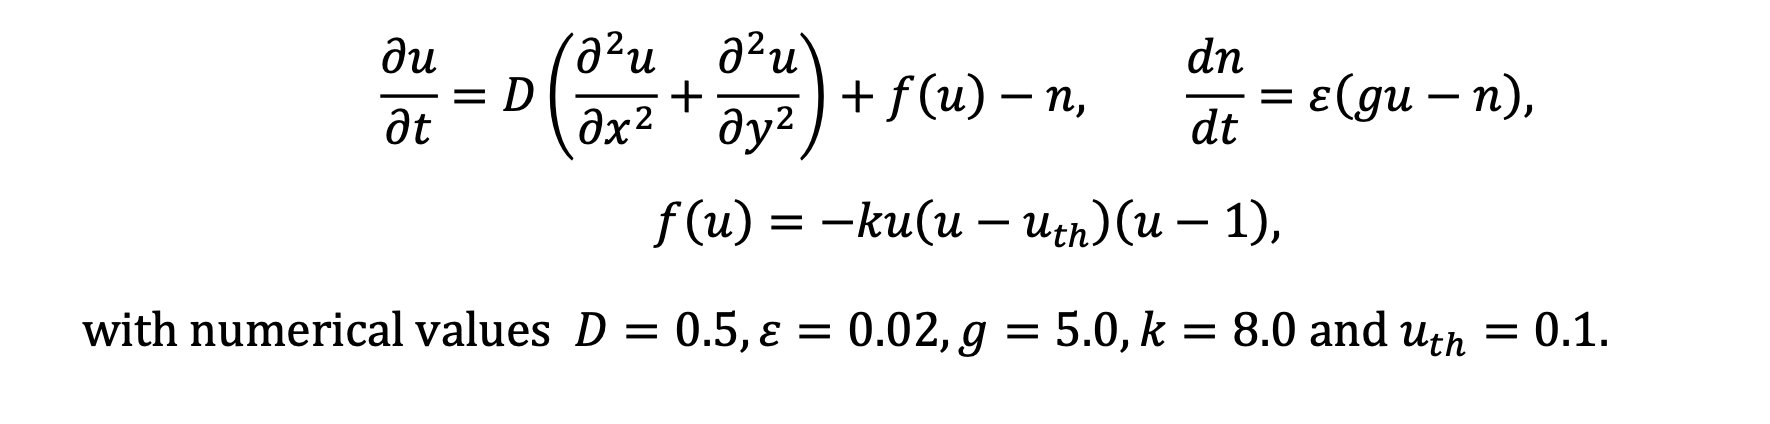

2. Simulate Eptopic waves using FitzHugh model

3. Record virtual ECG signals from simulated arrythmia:
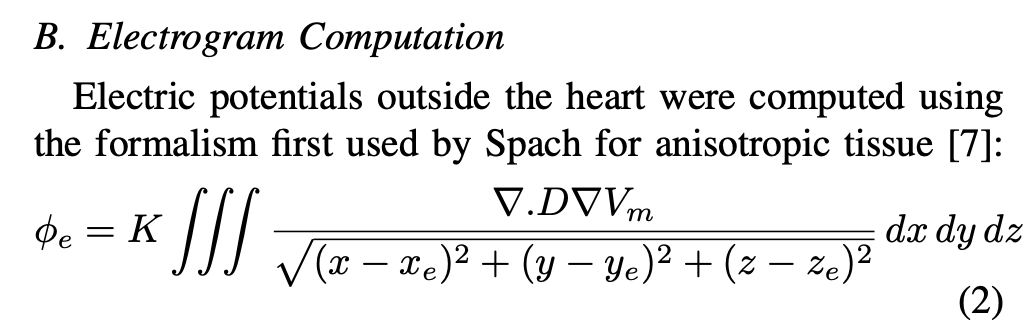

## Simulating Rotor in 2D space ##

* Solve the Fitz-Hugh-Nagumo equations using forward Euler method. This gives a time-step solution. 

* Create a 100x100 element grid for simulation 

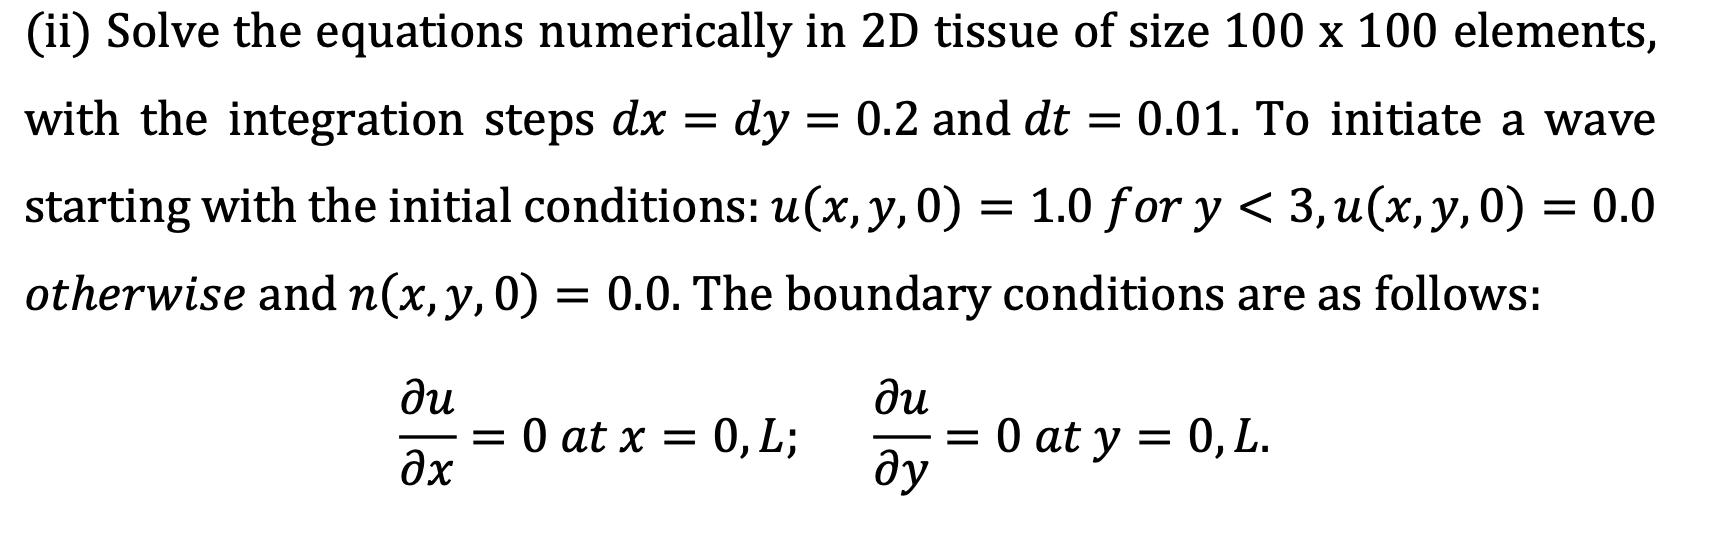


* Find a point when the wave is sufficiently far from the border. To initiate a rotor, set half (or any amount) of the values in the vertical direction to 0. 

In [92]:
import numpy as np
# Set up parameters

D = 0.5
epsilon = 0.02
g = 5.0
k = 8.0
uth = 0.1

#boundary conditions and steps
dx = 0.2
dy = 0.2
dt = 0.05 #used to be 0.1
len_x = 100
len_y = 100
time = 100
timesteps = 4000 #can be 10000

#set wave initiation boolean to false
wave_init = False

#initialize u + n
u = np.zeros((len_x, len_y))
n = np.zeros((len_x, len_y))
new_u = np.zeros((len_x, len_y))
new_n = np.zeros((len_x,len_y))


#initial conditions - u(x,y,0) = 1.0 while y>3. indexing starts from 1 through....?
u[:,:3] = 1
new_u[:,:3] = 1





## <center>Implementing Laplacian Operator</center> ##

Laplacian operator uses the Central Difference in both x and y directions:
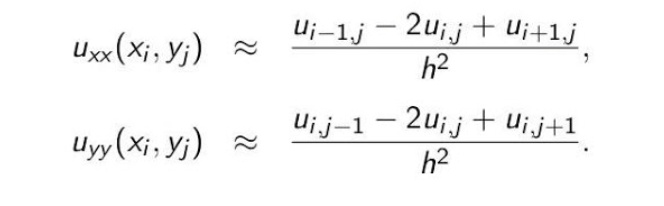

This implementation will have a function that returns a 2D central difference as the sum of both directions




In [93]:
def centDiff2D(a,i,j,h1,h2):
    x = (a[i-1,j] + a[i+1,j] - 2 * a[i,j] / h1**2)
    y = (a[i,j-1] + a[i,j+1] - 2 * a[i,j] / h2 **2)
    return x+y

In [94]:

#coordinates of the point for ECG 1
x0 = 150
y0 = 115
z0 = 40 #z-offest above the plane

x1 = -15
y1 = -15
z1 = 40

#create array of vector distances to ecg instead of recalculating (n**3->n**2)
dist_electrode_1 = np.zeros((len_x,len_y))
dist_electrode_2 = np.zeros((len_x,len_y))


for i in range(len_x):
    for j in range(len_y):
        
        #calc distance btwn (x0, y0, z0)  (x1, y1, z1,
        # z0 is always 0 bc its the plane of the grid
        distance_1 = dx * ((x0 - i)**2 + (y0 - j)**2 + (z0 - 0)**2)**(1/2)
        distance_2 = dx * ((x1-i)**2 + (y1-j)**2 + (z1 -0)**2)**(1/2)
        
        dist_electrode_1[i,j] = distance_1
        dist_electrode_2[i,j] = distance_2

    

#array to store integrated signal for recorded time steps
ecg_signal_1 = []
ecg_signal_2 = []



In [95]:

for t in range(0, time_steps):
    #print(t)
    
    #variable  to hold electrode signal integrated over the 2d grid
    integrated_signal_1 = 0
    integrated_signal_2 = 0

    #total 'width' of grid is about 3800 time steps on 0.01 
    #reset voltage in bottom half of window to zero
    if (t > 1300 and wave_init == False):
        print('Initiating spiral')
        new_u[int(len_y/2):,:] = 0.0
        wave_init = True
        #track the frames during iterations
        u_over_time = [u]

        
    
    #update the equations for each time step 
   # f = -k * u * (u - uth) * (u - 1)


    for i in range(len_y -1):
        for j in range(len_x -1):
            #call laplacian operator function
            #centraldiff = centDiff2D(u,i,j,dx,dy)
            
            centdiff_x = (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) / dx**2
            centdiff_y = (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]) / dy**2
            
            f = -k * u[i,j] * (u[i,j] - uth) * (u[i,j] - 1)
            n[i,j] = n[i,j] + dt * epsilon * (g * u[i,j] - n[i,j])

            #compute the new voltage values from old
            new_u[i,j] = u[i,j] + (dt * (D * (centdiff_x + centdiff_y) + f - n[i,j]))


            #set boundary conditions for simulation grid
            new_u[:,0] = new_u[:,1] #du/dx = 0 @ x=0
            new_u[0,:] = new_u[1,:]
            new_u[:,len_x-1] = new_u[:,len_x-2] #du/dx = 0 @ x=L
            new_u[len_y-1,:] = new_u[len_y-2,:]
            
            #calc integrand
            integrand_1 = (D * (centdiff_x + centdiff_y)) / (dist_electrode_1[i,j])
            #calc integrand
            integrand_2 = (D * (centdiff_x + centdiff_y)) / (dist_electrode_2[i,j])

            #trapezoidal rule integration
            integrated_signal_1 = integrated_signal_1 + integrand_1
            integrated_signal_2 = integrated_signal_2 + integrand_2


            
    
   

    #updating so that u is the previous loops' new_u
    u = np.copy(new_u)


    # checks that wave has been initialized & saves frames every 100 timesteps
    if t%100 == 0:
        print(t)
        u_over_time.append(np.copy(new_u))
        ecg_signal_1.append(integrated_signal_1)
        ecg_signal_2.append(integrated_signal_2)


    
    #n = new_n



0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
Initiating spiral
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


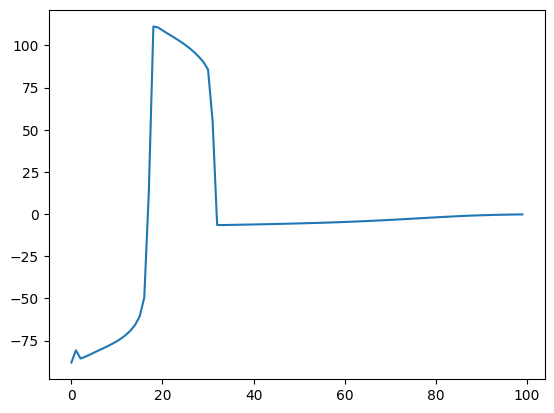

In [102]:
import matplotlib.pyplot as plt

Lii = ecg_signal_2 - ecg_signal_1
plt.plot(range(len(Lii)),ecg_signal)
#plt.axes


In [97]:
np.min(u_over_time[0])

-0.27760615808130706

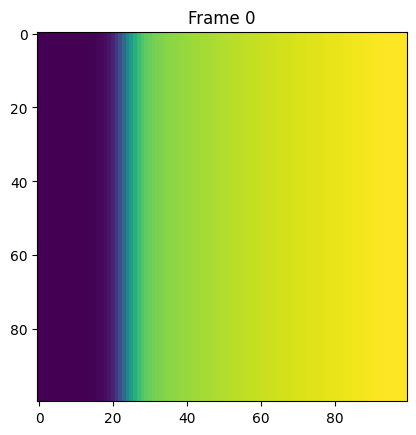

In [98]:
# Thanks for figuring this portion out Jakub

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create a function to update the plot at each frame
def update(frame):
    plt.clf()  # Clear the previous frame
    4
    #plt.colorbar(boundary = [-0.4,1])
    plt.title(f'Frame {frame}')

# Create the figure and initial plot
fig, ax = plt.subplots()
im = ax.imshow(u_over_time[0], cmap='viridis')
plt.title('Frame 0')

 

# Create the animation
num_frames = len(u_over_time)
ani = FuncAnimation(fig, update, frames=num_frames, repeat=False)


# Save the animation as a GIF
ani.save('rotor.gif', writer='pillow', fps=10)  # Adjust fps as needed
